<a href="https://colab.research.google.com/github/junginee/From-ML-to-DL/blob/main/from_preprocessing_to_model_predict_%EA%B3%A0%EB%8F%84%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.analyticsvidhya.com/blog/2022/01/sentiment-analysis-with-lstm/



Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ 5Îã®Í≥Ñ

1. Ï†ïÍ∑úÌôîÎ°ú ÌïúÍµ≠Ïñ¥Îßå ÎÇ®Í∏∞Í∏∞

2. ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Î°ú Ïñ¥Í∞Ñ Ï∂îÏ∂úÌïòÍ∏∞

3. Î∂àÏö©Ïñ¥ Ï†úÍ±∞ÌïòÍ∏∞

4. Î¨∏ÏûêÎ•º Ïù∏Îç±Ïä§Î≤°ÌÑ∞Î°ú Ï†ÑÌôòÌïòÍ∏∞

5. Ìå®Îî©Ï≤òÎ¶¨ÌïòÍ∏∞

In [ ]:
from tensorflow.python.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.python.keras.callbacks  import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import urllib.request

**1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_data = pd.read_csv( '/content/train_data.csv',sep='\t') 
test_data = pd.read_csv( '/content/test_data.csv',sep='\t') 

Mounted at /content/drive


**2. train Îç∞Ïù¥ÌÑ∞ Í∏çÏ†ï / Î∂ÄÏ†ï Í∞íÏùò Î∂ÑÌè¨ ÌôïÏù∏**

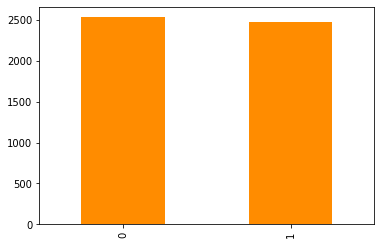

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar', color='darkorange')
plt.show()

**3. train Îç∞Ïù¥ÌÑ∞ ÌïúÍ∏ÄÍ≥º Í≥µÎ∞± Ï†úÏô∏ÌïòÍ≥† Î™®Îëê Ï†úÍ±∞**

In [ ]:
train_data['content'] = train_data['content'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


**4. train Îç∞Ïù¥ÌÑ∞ Îπà Í∞íÏùÑ Í∞ÄÏßÑ Ìñâ => Null Í∞íÏúºÎ°ú Î≥ÄÍ≤Ω Î∞è Ï†úÍ±∞**

In [ ]:
train_data['content'].replace('', np.nan, inplace = True) 
print(train_data.isnull().sum()) 

train_data = train_data.dropna(how = 'any')
print(len(train_data)) 

ÏàúÏÑú          0
id          0
content    17
label       0
dtype: int64
4983


- Í≥µÎ∞±ÏùÄ null Í∞íÏúºÎ°ú Î≥ÄÍ≤Ω
- 17Í∞ú Í≤∞Ï∏°Ïπò Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùå

**5. test Îç∞Ïù¥ÌÑ∞ train Îç∞Ïù¥ÌÑ∞ÏôÄ ÎèôÏùº Î∞©Î≤ïÏúºÎ°ú Ï†ÑÏ≤òÎ¶¨**

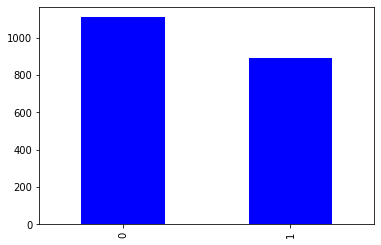

ÏàúÏÑú         0
id         0
content    1
label      0
dtype: int64
1999


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
test_data['label'].value_counts().plot(kind = 'bar', color='blue')
plt.show()

test_data['content'] = test_data['content'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","")

test_data['content'].replace('', np.nan, inplace = True) #Í≥µÎ∞±ÏùÄ null Í∞íÏúºÎ°ú Î≥ÄÍ≤Ω
print(test_data.isnull().sum()) 
test_data = test_data.dropna(how = 'any')
print(len(test_data)) #1999

**6. konlpy ÏÑ§Ïπò**

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 19.4 MB 29.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 453 kB 59.5 MB/s 


**7. ÌÜ†ÌÅ∞Ìôî**

In [ ]:


from konlpy.tag import Okt
from tqdm import tqdm

stopwords = ['Ïùò','Í∞Ä','Ïù¥','ÏùÄ','Îì§','Îäî','Ï¢Ä','Ïûò','Í±ç','Í≥º','ÎèÑ','Î•º','ÏúºÎ°ú','Ïûê','Ïóê','ÏôÄ','Ìïú','ÌïòÎã§','Îã§','Ìïò','Í≥†','ÏùÑ','Ïù∏','ÎìØ','ÎÑ§','ÏßÄ','ÏûÑ','Í≤å']

okt = Okt()

x_train = []
for sentence in tqdm(train_data['content']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # ÌÜ†ÌÅ∞Ìôî
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    x_train.append(stopwords_removed_sentence)
print(x_train[:10])

x_test = []
for sentence in tqdm(test_data['content']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # ÌÜ†ÌÅ∞Ìôî
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    x_test.append(stopwords_removed_sentence)
print( x_test[:10])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4983/4983 [00:22<00:00, 218.58it/s]


[[], [], ['Í∑ÄÏóΩÎã§', 'Ïú§', 'ÌôîÏî®', 'Îëê', 'Î∂ÑÎã§', 'Í∑ÄÏóΩÎã§'], ['ÏÜåÎ≥¥Î°úÎπµ'], ['Ïó¨Í∏∞', 'ÌôîÏû•Ïã§', 'Ïñ¥Îîî', 'ÏóêÏöî', 'Ï†ÄÌù¨', 'ÌôîÏû•Ïã§', 'Îî∞Î°ú', 'ÏóÜÎã§'], ['ÎÖÑ', 'Ïõî', 'ÌèâÏùº', 'Ï†ÄÎÖÅ', 'Î∞©Î¨∏', 'ÏïåÏ∞®Îã§', 'Î≥¥Ïù¥Îã§', 'Íµ¨ÏÑ±', 'Î≥Ñ', 'Í≤∞Ìï®', 'ÏóÜÎã§', 'ÌååÏä§ÌÉÄ', 'Îã§Îã•Îã§Îã•', 'Î∂ôÎã§', 'ÏûêÎ¶¨', 'Î≥Ñ', 'ÌäπÏÉâ', 'ÏóÜÎã§', 'ÌååÏä§ÌÉÄ'], ['Ïö∞Î¶¨', 'ÌÉÄÍ≥†ÎÇòÎã§', 'Îü¨ÎÑà', 'ÏÇ¨Ïû•', 'Îãò', 'ÎßêÏîÄ', 'ÏπúÏ†àÌïòÎã§', 'ÏÇ¨Ïû•', 'Îãò', 'Îß§Îã§', 'Îãò', 'ÎçïÎ∂Ñ', 'ÎßéÏù¥', 'Î∞∞Ïö∞Îã§', 'Íµ¨Îß§', 'ÌñâÎ≥µÌïòÎã§', 'Î∂àÎã§', 'Í≥†ÎßôÎã§'], ['Íµ∞', 'Íµ∞', 'Í∏à', 'ÏûàÎã§', 'ÏûêÎã§', 'Î™®Îëê', 'Í∂ÅÍ∏àÌïòÎã§', 'ÎåÄÌïúÎØºÍµ≠', 'ÏóêÏÑú', 'Í≥≥', 'Îßå', 'ÏûàÎã§', 'Í∑∏', 'Í≥≥Í≥±', 'Í≥±Ï∞Ω', 'Îßõ', 'ÎÅùÎÇ¥Ï£ºÎã§', 'Ï∞Ω', 'Ï∞∏Îßê', 'Î°ú', 'ÏπòÎã§', 'Íµ¨Îßå', 'Ïöî'], ['Íµ∞Ïπ®', 'Ï£ºÎã§', 'ÏûêÎã§', 'ÏÇ¨Îûå', 'Î≤åÎñ°', 'ÏùºÏñ¥ÎÇòÎã§', 'Í∑∏ÎÖÄ', 'ÎåÄÏÑ∏', 'Ìûà', 'Î∞•', 'Í±∞', 'ÏïÑÏãú', 'Ï£†', 'ÏóÜÎã§', 'ÏÇ¨Îûë', 'Ïï†Ï†ï', 'Ìûà', 'Î∞•', 'ÏóêÍ≤å', 'ÏèüÎã§', 'Ï£º', 'ÏÑ∏', 'Ïóº'

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1999/1999 [00:06<00:00, 301.37it/s]

[['ÏùåÏãù', 'ÏÇ¨ÏßÑ', 'Î≥¥Îã§', 'ÎßéÏù¥', 'Îã¨Îùº', 'Ïöî', 'ÏöîÎ¶¨', 'Î∂Ñ', 'Î∞îÎÄåÎã§', 'Í±∞', 'Í∞ôÎã§', 'Îã§Î•∏', 'ÏïàÏ£º', 'ÏßúÎã§', 'Îã¨Îã§', 'Ìï¥ÎèÑ', 'Ïà†', 'ÏûêÎã§', 'Îì§Ïñ¥Í∞ÄÎã§', 'ÎÇòÏÅòÎã§', 'ÏïäÎã§', 'Îã§Îßå', 'Î™®', 'Ï∞åÎ¶¨', 'ÌõÑ', 'Ïã§ÎßùÌïòÎã§', 'Ïã∂Îã§', 'ÏïäÎã§', 'Ï†àÎåÄ', 'ÏãúÌÇ§Îã§', 'ÎßêÎã§', 'Í∑∏Î¶¨Í≥†', 'Î∞ë', 'ÏïåÎ∞îÏÉù', 'Î∂Ñ', 'Îßê', 'Í≥µÍ∞ê', 'Í∞ÄÎã§', 'ÏßÄÏ†ê', 'Ïû•', 'Î≥¥Ïù¥Îã§', 'Î∂ÑÎßå', 'Í¥ëÏû•', 'Ìûà', 'Ïó¥Ïã¨Ìûà', '„Öã„Öã'], ['ÏùåÏãù', 'Îßõ', 'Î≥ÑÎ°ú', 'ÏóêÏöî', 'Íµ¨Î∞òÌè¨Ïó≠', 'Ï™Ω', 'ÏãùÏÇ¨', 'Îïå', 'ÏóÜÎã§', 'ÌïúÎ≤à', 'Ïî©', 'Í∞ÄÎã§', 'Ïßë', 'Ïù¥ÏóêÏöî', 'ÎßåÎëêÍµ≠', 'ÏãúÌÇ§Îã§', 'Í∞ÑÎèÑ', 'Ï†ÑÌòÄ', 'ÏïàÎêòÎã§', 'ÎßåÎëê', 'ÏÜç', 'Ïû¨Î£å', 'ÎëêÎ∂Ä', 'Î°ú', 'Ï±ÑÏö∞Îã§', 'ÏßÑÏßú', 'ÎßõÏóÜÎã§', 'Îçî', 'Ìô©ÎãπÌïòÎã§', 'Ïù¥Î≤à', 'Ïç®Îã§', 'ÎπôÌïò', 'ÏïÑÏ£ºÎ®∏Îãà', 'ÏôÑÏ†Ñ', 'Îß§ÎÑà', 'ÏóÜÎã§', 'Ï†Ñ', 'ÏûàÎã§', 'ÏïÑÏ£ºÎ®∏Îãà', 'Î™©ÏÜåÎ¶¨', 'ÎßéÏù¥', 'ÌÅ¨Îã§', 'ÏÜêÎãò', 'Îì§Ïñ¥Ïò§Îã§', 'Ïñ¥ÏÑú', 'Ïò§Îã§', 'ÎùºÍ≥†', 'Ïù∏ÏÇ¨', 'Ìï¥Ï£ºÎã§', 'ÏßÄÍ∏à', 'ÏïÑÏ£ºÎ®

 - OktÏùò stem = TrueÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ ÏùºÏ†ï ÏàòÏ§ÄÏùò Ï†ïÍ∑úÌôîÎ•º ÏàòÌñâÌï¥, Îã®Ïñ¥Îì§ÏùÑ ÏïåÏïÑÏÑú Ï†ïÍ∑úÌôî Ìï¥Ï£ºÍ≥†, Ïò§ÌÉÄÎèÑ ÏàòÏ†ïÌï¥Ï£ºÎäî Í∏∞Îä•ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎã§.

- ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Î°ú ÌÜ†ÌÅ∞ÌôîÌï¥Ï§Ä Ïù¥Ïú†Îäî Í∞ôÏùÄ Îã®Ïñ¥ÏùºÏßÄÎùºÎèÑ ÌòïÌÉúÏÜå(Ïòà:Ïùò, Î•º, Í∞Ä, ÎèÑ Îì±)ÏôÄ Î∂ôÏñ¥ÏûàÏúºÎ©¥ Í∏∞Í≥ÑÎäî Ï†ÑÎ∂Ä Îã§Î•∏ Îã®Ïñ¥Î°ú Ïù∏ÏãùÌïòÍ≤å ÎêúÎã§.

- ÌÜ†ÌÅ∞Ïù¥ÎûÄ? Î¨∏Î≤ïÏ†ÅÏúºÎ°ú Îçî Ïù¥ÏÉÅ ÎÇòÎàå Ïàò ÏóÜÎäî Ïñ∏Ïñ¥ÏöîÏÜå

- ÌÖçÏä§Ìä∏ ÌÜ†ÌÅ∞Ìôî? ÎßêÎ≠âÏπòÎ°úÎ∂ÄÌÑ∞ ÌÜ†ÌÅ∞ÏùÑ Î∂ÑÎ¶¨ÌïòÎäî ÏûëÏóÖ

**8. Ï†ïÏàò Ïù∏ÏΩîÎî©**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
print(tokenizer.word_index)

{'Î®πÎã§': 1, 'Ïïà': 2, 'ÏóÜÎã§': 3, 'ÎÑàÎ¨¥': 4, 'ÏûàÎã§': 5, 'Î≥¥Îã§': 6, 'Îßõ': 7, 'Ï¢ãÎã§': 8, 'Í∞ÄÎã§': 9, 'ÎßõÏûàÎã§': 10, 'Î∂Ñ': 11, 'Í∞ôÎã§': 12, 'Î°ú': 13, 'ÏïÑÎãàÎã§': 14, 'Ïù¥Îã§': 15, 'Ïöî': 16, 'Îßå': 17, 'ÏóêÏÑú': 18, 'ÏïäÎã§': 19, 'ÎÇòÏò§Îã§': 20, 'ÎêòÎã§': 21, 'Ïò§Îã§': 22, 'ÏßÑÏßú': 23, 'Îïå': 24, 'Îãò': 25, 'ÌïòÍ≥†': 26, 'Í∑∏ÎÉ•': 27, 'Îì§Îã§': 28, 'Í≤É': 29, 'Ï†Ä': 30, 'Î™ª': 31, 'ÏßÅÏõê': 32, 'ÏÇ¨Ïû•': 33, 'ÏÇ¨Îûå': 34, 'Î∞õÎã§': 35, 'Í∑∏Î†áÎã§': 36, 'Í≥≥': 37, 'Í∞ÄÍ≤©': 38, 'ÏÜêÎãò': 39, 'ÏùåÏãù': 40, 'Í∑∏': 41, 'ÏãúÍ∞Ñ': 42, 'Ïó¨Í∏∞': 43, 'Îçî': 44, 'Î∂àÏπúÏ†àÌïòÎã§': 45, 'ÏòÅÏÉÅ': 46, '„Ö†„Ö†': 47, 'Îßê': 48, 'Ï£ºÎã§': 49, 'Îã§Î•∏': 50, 'ÏïåÎã§': 51, 'ÎÇò': 52, 'Ìï¥Ï£ºÎã§': 53, 'ÎÑòÎã§': 54, 'Îëê': 55, 'Ï£ºÎ¨∏': 56, 'Ï†Å': 57, 'ÎßéÎã§': 58, 'ÏãúÌÇ§Îã§': 59, 'ÏπúÏ†àÌïòÎã§': 60, 'Ïñ∏Îãà': 61, 'Î≥ÑÎ°ú': 62, 'Í±∞': 63, 'Í≥±Ï∞Ω': 64, 'ÎßéÏù¥': 65, 'ÏûêÎã§': 66, 'ÏÑú': 67, 'ÏÑúÎπÑÏä§': 68, 'Ïôú': 69, 'ÎÇòÎã§': 70, 'Ïßë': 71, 'Ï†ïÎßê': 72, 'Ïùº': 73, 'Í≥†Í∏∞': 74, 'Ïù∏Î

**9. Îì±Ïû• ÎπàÎèÑÏàò ÎÇÆÏùÄ Îã®Ïñ¥ ÏÉâÏ∂ú**

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) #Îã®Ïñ¥Ïùò Ïàò
rare_cnt = 0 #Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Í∞úÏàòÎ•º Ïπ¥Ïö¥Ìä∏
total_freq = 0 #ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤¥ Îã®Ïñ¥ ÎπàÎèÑÏàò Ï¥ù Ìï©
rare_freq = 0 #Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÏùò Ï¥ù Ìï©

#Îã®Ïñ¥ÏôÄ ÎπàÎèÑÏàòÏùò ÏåçÏùÑ key-valueÎ°ú Î∞õÎäîÎã§.
for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value


  #Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏúºÎ©¥
  if(value < threshold):
     rare_cnt = rare_cnt + 1
     rare_freq = rare_freq + value

print('Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞:' , total_cnt)
print('Îì±Ïû• ÎπàÎèÑÍ∞Ä %sÎ≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò:%s'%(threshold -1, rare_cnt))
print('Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®:',(rare_cnt/total_cnt)*100)
print('Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®:',(rare_freq/total_freq)*100)

Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞: 9632
Îì±Ïû• ÎπàÎèÑÍ∞Ä 2Î≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò:5967
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®: 61.94975083056479
Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®: 8.051263050064298


ÎÜíÏùÄ Ï†ïÏàòÍ∞Ä Î∂ÄÏó¨Îêú Îã®Ïñ¥Îì§ÏùÄ Îì±Ïû• ÎπàÎèÑ ÏàòÍ∞Ä Îß§Ïö∞ ÎÇÆÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏ÌïúÎã§. ÎπàÎèÑÏàò ÎÇÆÏùÄ Îã®Ïñ¥Îì§ÏùÄ ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨ÏóêÏÑú Î∞∞Ï†úÌïòÍ≥†Ïûê ÌïúÎã§. Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä 2Ìöå ÎØ∏ÎßåÏù∏ Îã®Ïñ¥Îì§Ïù¥ Ïù¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏñºÎßåÌÅºÏùò ÎπÑÏ§ëÏùÑ Ï∞®ÏßÄÌïòÎäîÏßÄ ÌôïÏù∏ÌïòÍ≥†Ïûê ÌïúÎã§.

**10. ÎπàÎèÑÏàò ÎÇÆÏùÄ Îã®Ïñ¥ Ï†úÍ±∞**

In [ ]:
#Ï†ÑÏ≤¥ Îã®Ïñ¥ Í∞úÏàò Ï§ë ÎπàÎèÑÏàò 2Ïù¥ÌïòÏù∏ Îã®Ïñ¥ Ï†úÍ±∞
#0Î≤à Ìå®Îî© ÌÜ†ÌÅ∞ Í≥†Î†§ÌïòÏó¨ +1

vocab_size = total_cnt - rare_cnt + 1
print('Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ :', vocab_size)

Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ : 3666


Îì±Ïû• ÎπàÎèÑÍ∞Ä 2Ìöå Ïù¥ÌïòÏù∏ Îã®Ïñ¥Îì§ÏùÄ ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨ÏóêÏÑú Î≥ÑÎ°ú Ï§ëÏöîÌïòÏßÄ ÏïäÏùÑ ÎìØ ÌïòÎã§. Îî∞ÎùºÏÑú Ïù¥ Îã®Ïñ¥Îì§ÏùÑ Ï†ïÏàò Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏóêÏÑú Î∞∞Ï†úÏãúÏº∞Îã§.

**11. ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§ Ï†ïÏàò ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôò**

In [ ]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)

x_test = tokenizer.texts_to_sequences(x_test)

print(x_train[:10])

[[], [], [89, 1173, 1421, 55, 2128, 89], [], [43, 626, 227, 292, 488, 626, 602, 3], [264, 791, 1325, 339, 132, 2928, 150, 1174, 138, 3, 408, 2129, 758, 210, 138, 2463, 3, 408], [293, 2929, 33, 25, 503, 60, 33, 25, 1326, 25, 978, 65, 2930, 409, 459, 397, 1041], [792, 792, 1726, 5, 66, 471, 294, 1727, 18, 37, 17, 5, 41, 64, 7, 2464, 1103, 13, 295, 16], [2465, 49, 66, 34, 979, 2466, 673, 87, 63, 980, 513, 3, 296, 2931, 673, 87, 304, 2130, 574, 504, 2131, 64, 890, 1728, 95, 64, 1175, 16, 933], [62, 7, 3, 1257, 195]]


Îã®Ïñ¥ ÏßëÌï©ÏùÑ ÏºÄÎùºÏä§ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï¶à Ïù∏ÏûêÎ°ú ÎÑòÍ≤®Ï£ºÍ≥† ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Î•º Ï†ïÏàò ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôòÌñàÎã§.

**12. ÌïÑÏöîÌï¥ Î≥¥Ïù¥ÏßÄ ÏïäÎäî Ïª¨Îüº Ï†úÍ±∞(ÏàúÏÑú, id)**

In [ ]:
train_data.drop(columns=['ÏàúÏÑú','id'], axis=1, inplace = True, errors='ignore')
test_data.drop(columns=['ÏàúÏÑú','id'], axis=1, inplace = True, errors='ignore')

**13. y_trainÍ≥º y_testÎ•º Î≥ÑÎèÑÎ°ú Ï†ÄÏû•**

In [ ]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

y_trainÍ≥º y_testÎ•º Î≥ÑÎèÑÎ°ú Ï†ÄÏû•ÌñàÎã§.

**14. Îπà ÏÉòÌîå Ï†úÍ±∞**

In [ ]:
drop_train = [index for index, sentence in enumerate(x_train) if len(sentence)< 1]

In [ ]:
x_train = np.delete(x_train, drop_train, axis = 0)
y_train = np.delete(y_train, drop_train, axis = 0)

print(len(x_train))
print(len(y_train))

4917
4917


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÎπàÎèÑÏàòÍ∞Ä ÎÇÆÏùÄ Îã®Ïñ¥Í∞Ä ÏÇ≠Ï†úÎêòÏóàÎã§Îäî Í≤ÉÏùÄ ÎπàÎèÑÏàòÍ∞Ä ÎÇÆÏùÄ Îã®Ïñ¥Îßå Íµ¨ÏÑ±ÎêòÏóàÎçò Îç∞Ïù¥ÌÑ∞Îì§ÏùÄ Îπà ÏÉòÌîåÏù¥ ÎêòÏóàÎã§Îäî Í≤ÉÏùÑ ÎúªÌïúÎã§. Îπà ÏÉòÌîåÎì§ÏùÄ Ïñ¥Îñ§ Î†àÏù¥Î∏îÏù¥ Î∂ôÏñ¥ÏûàÎçò ÏùòÎØ∏Í∞Ä ÏóÜÏúºÎØÄÎ°ú Îπà ÏÉòÌîåÎì§ÏùÑ Ï†úÍ±∞Ìï¥Ï£ºÎäî ÏûëÏóÖÏùÑ ÌïúÎã§. Í∞Å Îç∞Ïù¥ÌÑ∞Îì§Ïùò Í∏∏Ïù¥Î•º ÌôïÏù∏Ìï¥ Í∏∏Ïù¥Í∞Ä 0Ïù∏ ÏÉòÌîåÎì§Ïùò Ïù∏Îç±Ïä§Î•º Î∞õÏïÑÏôîÎã§. ÏÉâÏ∂ú ÌõÑ Í∏∏Ïù¥Í∞Ä 0Ïù∏ ÏÉòÌîåÎì§ÏùÄ Ï†úÍ±∞Ìï¥Ï£ºÏóàÍ≥†, Ï†úÍ±∞ ÌõÑ Í∞úÏàòÎ•º ÌôïÏù∏ÌñàÎã§.

**15. Ìå®Îî©Ï≤òÎ¶¨**

ÎåìÍ∏Ä ÏµúÎåÄ Í∏∏Ïù¥ : 464
ÎåìÍ∏Ä ÌèâÍ∑† Í∏∏Ïù¥ : 17.15965019320724


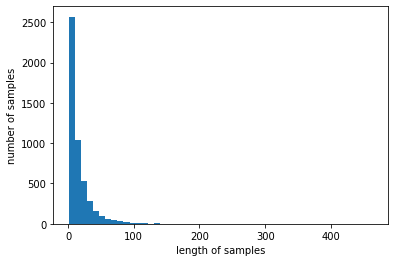

In [ ]:
print('ÎåìÍ∏Ä ÏµúÎåÄ Í∏∏Ïù¥ :',max(len(comment) for comment in x_train))
print('ÎåìÍ∏Ä ÌèâÍ∑† Í∏∏Ïù¥ :',sum(map(len, x_train))/len(x_train))
plt.hist([len(comment) for comment in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

ÏÑúÎ°ú Îã§Î•∏ Í∏∏Ïù¥Ïùò ÏÉòÌîåÎì§Ïùò Í∏∏Ïù¥Î•º ÎèôÏùºÌïòÍ≤å ÎßûÏ∂∞Ï£ºÎäî Ìå®Îî© ÏûëÏóÖÏùÑ ÏßÑÌñâÌï†Í≤ÉÏù¥Îã§. Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í∞ÄÏû• Í∏∏Ïù¥Í∞Ä Í∏¥ commentÏôÄ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò Í∏∏Ïù¥ Î∂ÑÌè¨Î•º ÌôïÏù∏ÌïòÍ≤†Îã§.

Í∞ÄÏû• Í∏¥ ÎåìÍ∏Ä Í∏∏Ïù¥Îäî 464Ïù¥Î©∞, Í∑∏ÎûòÌîÑÎ•º Î¥§ÏùÑ Îïå Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò Í∏∏Ïù¥ Î∂ÑÌè¨Îäî ÎåÄÏ≤¥Ï†ÅÏúºÎ°ú ÏïΩ 100 ÎÇ¥Ïô∏Ïùò Í∏∏Ïù¥Î•º Í∞ÄÏßÄÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§. Î™®Îç∏Ïù¥ Ï≤òÎ¶¨Ìï† Ïàò ÏûàÎèÑÎ°ù x_trainÍ≥º x_testÏùò Î™®Îì† ÏÉòÌîåÏùò Í∏∏Ïù¥Î•º ÌäπÏ†ï Í∏∏Ïù¥Î°ú ÎèôÏùºÌïòÍ≤å ÎßûÏ∂∞Ï§Ñ ÌïÑÏöîÍ∞Ä ÏûàÎã§. ÌäπÏ†ï Í∏∏Ïù¥ Î≥ÄÏàòÎ•º max_lenÏúºÎ°ú Ï†ïÌïúÎã§. ÎåÄÎ∂ÄÎ∂ÑÏùò ÎåìÍ∏ÄÏù¥ ÏûòÎ¶¨ÏßÄ ÏïäÎèÑÎ°ù Ìï† Ïàò ÏûàÎäî ÏµúÏ†ÅÏùò max_lenÏùÑ ÌåêÎã®Ìï¥Ïïº ÌïúÎã§.

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä %s Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: %s'%(max_len, (count / len(nested_list))*100))

  
max_len = 100
below_threshold_len(max_len, x_train)

Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä 100 Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: 98.92210697579826


Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä max_len Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®Ïù¥ Î™á %Ïù∏ÏßÄ ÌôïÏù∏ÌïòÎäî Ìï®ÏàòÎ•º ÎßåÎì§Í≥† ÌôïÏù∏ÌñàÎã§.

Ï†ÑÏ≤¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ï§ë ÏïΩ 98.9%Ïùò ÎåìÍ∏ÄÏù¥ 100Ïù¥ÌïòÏùò Í∏∏Ïù¥Î•º Í∞ÄÏßÄÎäî Í≤ÉÏùÑ ÌôïÏù∏ÌñàÎã§. Îî∞ÎùºÏÑú Î™®Îì† ÏÉòÌîåÏùò Í∏∏Ïù¥Î•º 100ÏúºÎ°ú ÎßûÏ∂úÍ≤ÉÏù¥Îã§.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

x_train.shape

(4917, 100)

**LSTM Î™®Îç∏**

**1. sequential Î™®Îç∏**

In [ ]:
#sequential Î≤ÑÏ†Ñ

# embedding_dim = 100
# hidden_units = 16
# vocab_size = 3666

# model = Sequential()
# model.add(Embedding(vocab_size, embedding_dim))
# model.add(Dropout(0.2))
# model.add(LSTM(hidden_units))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation='sigmoid'))

**2. Ìï®ÏàòÌòï Î™®Îç∏**

In [ ]:
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Input
from tensorflow.keras import regularizers

input1 =Input(shape= (100,))        
embedding1 = Embedding(3666,5,input_length=100)(input1)
lstm1 = LSTM(8)(embedding1)
output1 = Dense(1,activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))(lstm1)
model = Model(inputs= input1,outputs=output1)

model.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

import time
start_time = time.time()
history = model.fit(x_train, y_train, epochs=30, callbacks=[es, mc], batch_size=256, validation_split=0.2)
end_time = time.time()-start_time

print("LSTM ÏãúÍ∞Ñ :", end_time)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 5)            18330     
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 448       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 18,787
Trainable params: 18,787
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
16/16 [==============================] - 14s 443ms/step - loss: 0.7164 - acc: 0.5184 - val_loss: 0.7149 - val_acc: 0.4705

Epoch 00001: val_acc improved from -inf to 0.47053, saving model to best_model.h5
Epoch 2/30
16/16 [=====================

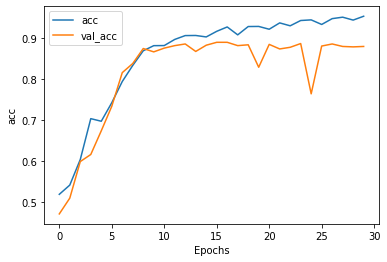

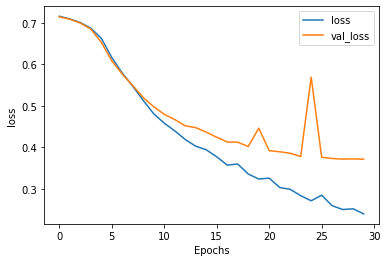

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n loss : %.3f" % (loaded_model.evaluate(x_test, y_test)[0]))
print("\n ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: %.2f" % (loaded_model.evaluate(x_test, y_test)[1]))

63/63 [==============================] - 2s 33ms/step - loss: 0.4138 - acc: 0.8619

 loss : 0.414
63/63 [==============================] - 2s 34ms/step - loss: 0.4138 - acc: 0.8619

 ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 0.86


ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º ÌÜµÌï¥ loss Í∞íÍ≥º Ï†ïÌôïÎèÑÎ•º ÌèâÍ∞ÄÌïúÎã§.

 ÌõàÎ†® Í≥ºÏ†ïÏóêÏÑú Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÌôïÎèÑÍ∞Ä Í∞ÄÏû• ÎÜíÏïòÏùÑ Îïå Ï†ÄÏû•Îêú Î™®Îç∏Ïù∏ 'best_model.h5'Î•º Î°úÎìúÌïúÎã§.

https://github.com/2runo/Curse-detection/blob/master/src/embedding.py
Ìï®Ïàò ÏûÑÎ≤†Îî© Ï∞∏Í≥†

 https://github.com/2runo/Curse-detection/blob/master/src/model.py
 Ìï®ÏàòÌòï Î™®Îç∏ Ï∞∏Í≥†

In [ ]:
from sklearn.metrics import accuracy_score

prediction = model.predict(x_test)
# Get labels based on probability 1 if p>= 0.5 else 0
y_predict = []
for i in prediction:
    if i >= 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)
print("Accuracy of prediction on test set : ", round(accuracy_score(y_test,y_predict),3))

Accuracy of prediction on test set :  0.832


ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° Ï†ïÌôïÎèÑ

**ÏÉàÎ°úÏö¥ Î¨∏Ïû• Í∏çÏ†ï/Î∂ÄÏ†ï ÏòàÏ∏°**

In [ ]:
new_sentence = [                               ]

encoded = tokenizer.texts_to_sequences(new_sentence)#Ï†ïÏàòÏù∏ÏΩîÎî©

padded = pad_sequences(encoded, padding='pre', maxlen=max_len) #Ìå®Îî©

prediction = model.predict(padded)
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
        
for i in range(len(new_sentence)):
    print(new_sentence[i])
    if pred_labels[i] == 1:
        s = 'Positive'
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)


ÎÉÑÏÉàÍ∞Ä ÏïàÎÇòÎäîÎç∞ÎèÑ ÏûòÎìúÏãúÎäî ÏõÖÏù¥Îãò ÎåÄÎã®ÌïòÏã≠ÎãàÎã§
Predicted sentiment :  Positive
ÏûêÍ∞ÄÍ≤©Î¶¨ Ìï¥Ï†úÎêòÍ≥† Îπ®Î¶¨ ÏûÖÎßõÏù¥ ÎèåÏïÑÏôÄÏÑú Ï¢ãÏùÄ Î®πÎ∞© Í≥ÑÏÜç Î≥¥Ïó¨Ï§¨ÏúºÎ©¥ Ìï¥Ïöî
Predicted sentiment :  Positive
ÌÉÄÏûÑÎùºÏù∏ Ô∏è0:41 Ïú°ÌöåÎπÑÎπîÎ∞• ÌïúÏûÖ1:16 Ïú°ÌöåÎπÑÎπîÎ∞• ÎëêÏûÖ02:04 Ïú°ÌöåÎπÑÎπîÎ∞• ÏÑ∏ÏûÖ02:16 Ïú°ÌöåÎπÑÎπîÎ∞• ÎÑ§ÏûÖ2:21 ÏÑ§Î†ÅÌÉïÍµ≠Î¨º ÌïúÏûÖ,ÎëêÏûÖ2:33 ÏÑ§Î†ÅÌÉï Íµ≠Î¨º ÏÑ∏ÏûÖ2:42 ÏÑ§Î†ÅÌÉïÍ≥†Í∏∞ ÌïúÏûÖ2:48 ÏÑ§Î†ÅÌÉïÍµ≠Î¨º ÎÑ§ÏûÖ3:06 ÏûêÎ©îÏù¥Ïπ¥ÏπòÌÇ® Ï≤´ÏûÖ 3:29ÏûêÎ©îÏù¥Ïπ¥ÏπòÌÇ® ÎëêÏûÖ3:34ÏûêÎ©îÏù¥Ïπ¥ ÏÑ∏ÏûÖ3:59Ïú°ÌöåÎπÑÎπîÎ∞• Îã§ÏÑØÏûÖ4:15 ÏÑ§Î†ÅÌÉï Íµ≠Î¨º Î∞•Ïóê ÎßêÏïÑÎ®πÍ∏∞ 4:18 ÏÑ§Î†ÅÌÉï Íµ≠Î¨º Î∞•Ïóê ÎßêÏïÑÎ®πÍ∏∞4:26 ÏÑ§Î†ÅÌÉïÍµ≠Î¨º +Î∞•+ÍπçÎëêÍ∏∞4:42 ÏÑ§Î†ÅÌÉï Íµ≠Î¨º Î∞•Ïóê ÎßêÏïÑÎ®πÍ∏∞4:48~ 5:26 ÏÑ§Î†ÅÌÉï Íµ≠Î¨º Î∞•Ïóê ÎßêÏïÑÎ®πÍ∏∞5:29 ÏûêÎ©îÏù¥Ïπ¥ÏπòÌÇ® ÎÑ§ÏûÖ5:37 ÏûêÎ©îÏù¥Ïπ¥ÏπòÌÇ® Îã§ÏÑØÏûÖ5:45 ~ 6:04 ÏûêÎ©îÏù¥Ïπ¥ÏπòÌÇ® Ïó¨ÏÑØÏûÖ6:27 ÎùºÎ©¥ ÌïúÏûÖ
Predicted sentiment :  Negative
ÏõÖÏù¥Îãò Ïù¥Í≤ÉÏ†ÄÍ≤É Î®πÎäîÎ™®Ïäµ ÌöåÎ≥µÎêúÎìØÌï©Îãà

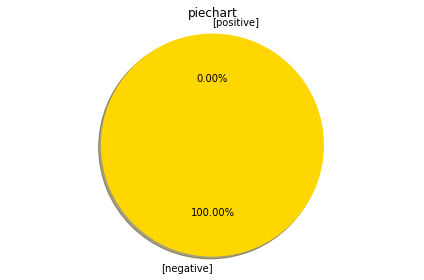

In [ ]:
total = len(positive) + len(negative)

def percentage(positive,  negative):
    return 100*float(positive)/float(total) 


count=0
positive=0
negative=0


if(new_sentence=='Positive'):
        positive += 1
else:
        negative += 1

positive=percentage(positive,100)
negative=percentage(negative,100)

labels=['[positive]', '[negative]']
sizes=[positive,negative]
colors=['yellowgreen',"gold"]
chart=plt.pie(sizes,labels=labels, startangle=90, autopct='%.2f%%',shadow=True,colors=colors)
plt.title("piechart")
plt.axis("equal")
plt.tight_layout()
plt.show()

In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]','', new_sentence)

  new_sentence = okt.morphs(new_sentence, stem=True) # ÌÜ†ÌÅ∞Ìôî
  
  new_sentence = [word for word in new_sentence if not word in stopwords] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
  
  encoded = tokenizer.texts_to_sequences([new_sentence]) # Ï†ïÏàò Ïù∏ÏΩîÎî©
  
  pad_new = pad_sequences(encoded, maxlen = max_len) # Ìå®Îî©
  
  score = float(loaded_model.predict(pad_new)) # ÏòàÏ∏°
  
  if(score > 0.5):
    print("{:.2f}% ÌôïÎ•†Î°ú Í∏çÏ†ï ÎåìÍ∏ÄÏûÖÎãàÎã§.\n".format(score * 100))
  else:
    print("{:.2f}% ÌôïÎ•†Î°ú Î∂ÄÏ†ï ÎåìÍ∏ÄÏûÖÎãàÎã§.\n".format((1 - score) * 100))

print('[Í∞êÏÑ±Î∂ÑÏÑù Í≤∞Í≥º]')
sentiment_predict("Ïì∞Î†àÍ∏∞")

[Í∞êÏÑ±Î∂ÑÏÑù Í≤∞Í≥º]
80.74% ÌôïÎ•†Î°ú Î∂ÄÏ†ï ÎåìÍ∏ÄÏûÖÎãàÎã§.

